# Acceleration study: experimental results and physical model

This notebook studies the experimental acceleration profile of the elevator as it travels up or down, for different number of levels during the flight.

*Note: There are 8 levels in the building, starting from 1 (lowest). The distance between Levels 1-2 is 4.1m, all other adjacent levels are spaced 3.7m apart.*

In [1]:
import MLQDM.dataprocess as ML_data
import MLQDM.elevphysmodel as ML_elev

import matplotlib.pyplot as plt
import pandas as pd

## Experimental data

On 2024-09, we experimentally measured the acceleration profile of the elevator using an iPhone 14.4. We recorded many trips for different directions and number of levels. The data stores the acceleration in the three Cartesian axes XYZ, as well as the absolute acceleration. The position is not recorded by the measuring device, so we recorded it independently.

Files:

* 2024_09_Acceleration_01.csv
* 2024_09_Acceleration_02.csv

In [2]:
# Data paths:
data_path = '../Data/Elevator_Acceleration/'
save_image_path = 'Images/' # Make sure this folder is in your directory
files = ["2024_09_Acceleration_01.csv","2024_09_Acceleration_02.csv"]

# Load data:
accel_1 = ML_data.accel_data('Acceleration record #1',data_path+files[0],
                             comment='Only 1-level flights')
accel_2 = ML_data.accel_data('Acceleration record #2',data_path+files[1],sep=',')

# Add information about events: [initial,final] parking levels:
accel_1.add_events_info([
    [0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],
    [7,6],[6,5],[5,4],[4,3],[3,2],[2,1],[1,0]
])
accel_2.add_events_info([
    [0,2],[2,4],[4,2],[2,0],
    [0,3],[3,6],[6,3],[3,0],
    [0,4],[4,7],[7,5],[5,3],[3,4],
    [4,7],[7,3],[3,1],[1,0],[0,7],[7,0]
])

# Add timing information about events: [initial,final] indexes for each event:
accel_1.add_events_times([
    [2450,3100],[4150,4950],[5900,6650],[7600,8300],[9350,10100],[10900,11700],[12550,13300],
    [14100,14900],[15750,16600],[17150,18100],[18850,19800],[20500,21400],[22050,23000],[23800,24700]
])
accel_2.add_events_times([
    [800,1900],[2700,3700],[4750,5800],[6550,7600],[8400,9700],
    [10500,11800],[12700,14100],[14650,16150],[17250,18800],[19700,20950],
    [21900,22900],[23600,24700],[25650,26500],[27200,28530],[29600,31150],
    [31900,33000],[33900,34800],[37000,39100],[39900,42100]
])

accel_1.info(), print('')
accel_2.info()

----------  accel_data object  ---------- 
Name: Acceleration record #1 
Comments: Only 1-level flights
Recording duration: 248.19 s
Available information for 14 traveling events, stats for travelled levels:
   -1 levels flight: 7 counts.
   1 levels flight: 7 counts.
There is available information for the timing of each event.

----------  accel_data object  ---------- 
Name: Acceleration record #2 
Comments: None
Recording duration: 424.52 s
Available information for 19 traveling events, stats for travelled levels:
   -7 levels flight: 1 counts.
   -4 levels flight: 1 counts.
   -3 levels flight: 4 counts.
   -2 levels flight: 2 counts.
   -1 levels flight: 1 counts.
   1 levels flight: 1 counts.
   2 levels flight: 5 counts.
   3 levels flight: 2 counts.
   4 levels flight: 1 counts.
   7 levels flight: 1 counts.
There is available information for the timing of each event.


## General results

Next, the Z-acceleration data is plot for both records, identifying the number of levels during each trip.

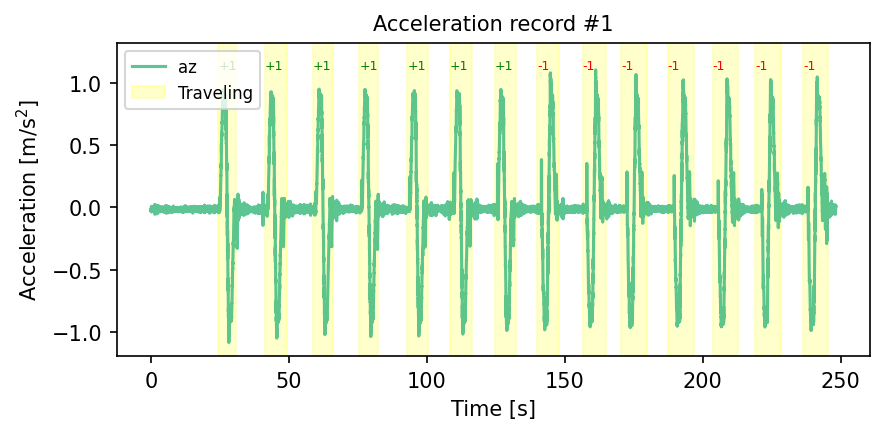

In [3]:
# Plot acceleration vs time:
save_name = save_image_path+'Acceleration_rec1'
accel_1.plot_raw_data(
    comps=['az'],label_font=6,save_name=save_name,save_format='svg')

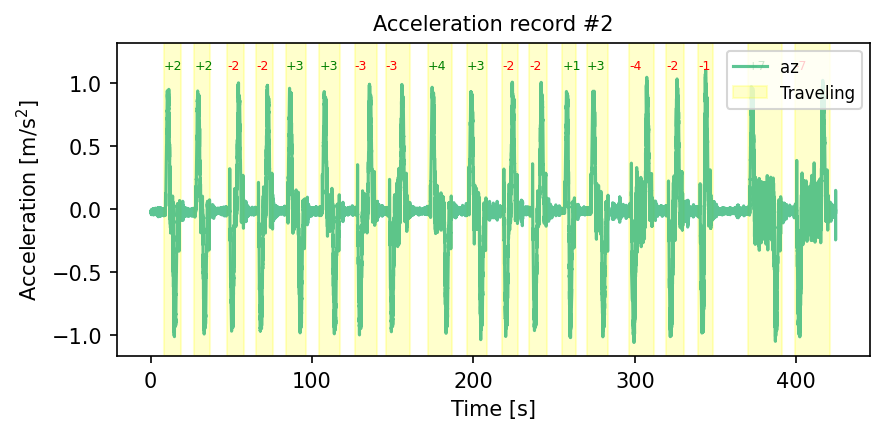

In [4]:
save_name = save_image_path+'Acceleration_rec2'
accel_2.plot_raw_data(
    comps=['az'],label_font=6,save_name=save_name,save_format='svg')

### Analysis for 1-level flights

For all 1-level flights going either upwards or downwards, the information is grouped into a histogram, identifying the average maximum acceleration in both positive (upwards) and negative (downwards) directions.

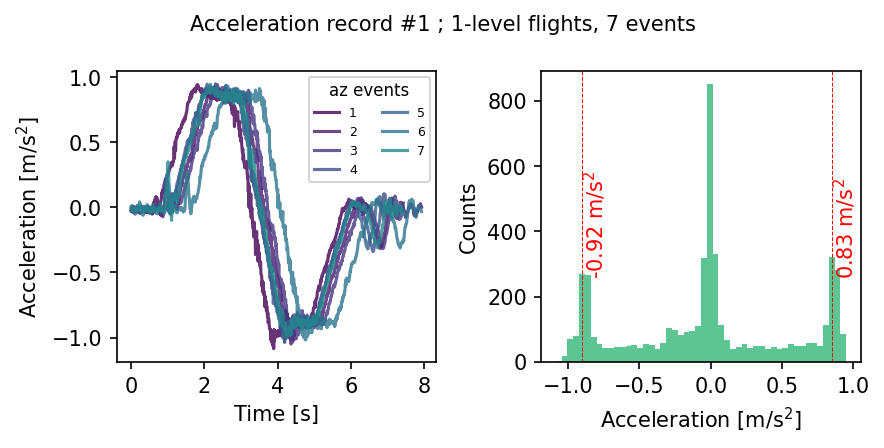

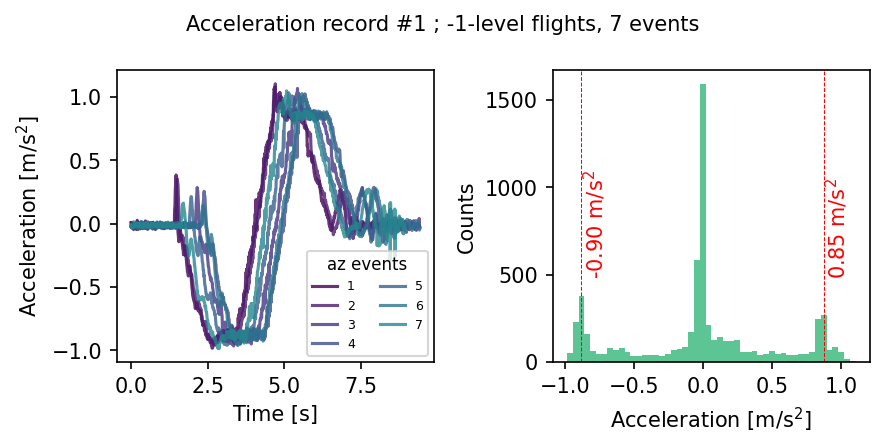

In [5]:
save_name = save_image_path+'Acceleration_rec1_hist'
accel_1.compare_same_flight_type(
    comp='az',N_bins=50,figsize=(6,3),a_thres=0.5,save_name=save_name,save_format='svg')

Study a single 1-level trip, stage by stage:

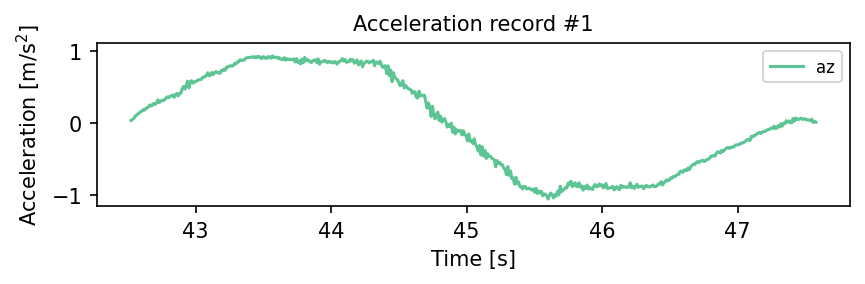

In [6]:
# Entire trip, about 5s:
accel_1.plot_raw_data(comps=['az'],label_font=6,i_range=[4280,4790],figsize=(6,2))

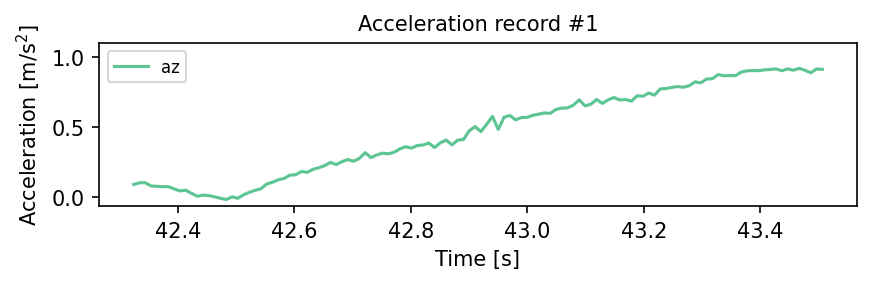

In [7]:
# First stage (increasing acceleration), about 1s:
accel_1.plot_raw_data(comps=['az'],label_font=6,i_range=[4260,4380],figsize=(6,2))

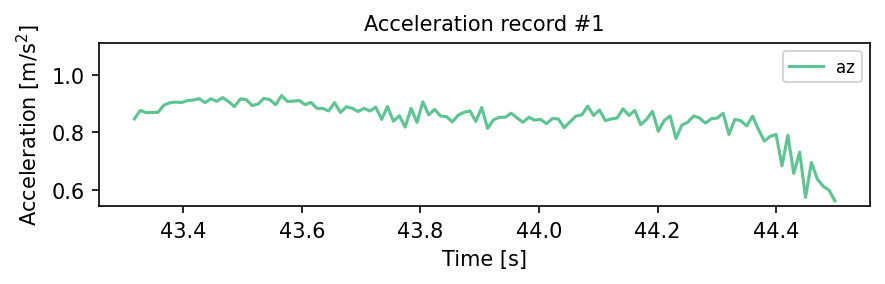

In [8]:
# Second stage (constant acceleration), about 1s:
accel_1.plot_raw_data(comps=['az'],label_font=6,i_range=[4360,4480],figsize=(6,2))

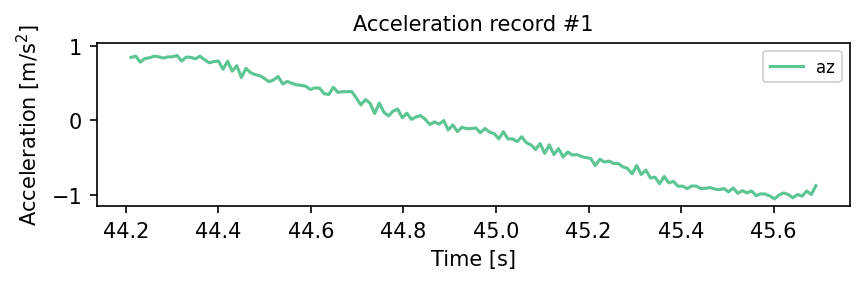

In [9]:
# Third stage (decreasing and increasing acceleration, down to negative), about 1.2s:
accel_1.plot_raw_data(comps=['az'],label_font=6,i_range=[4450,4600],figsize=(6,2))

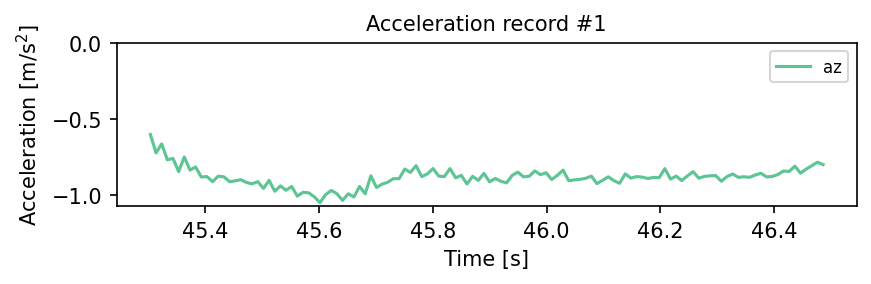

In [10]:
# Fourth stage (constant acceleration), about 1s:
accel_1.plot_raw_data(comps=['az'],label_font=6,i_range=[4560,4680],figsize=(6,2))

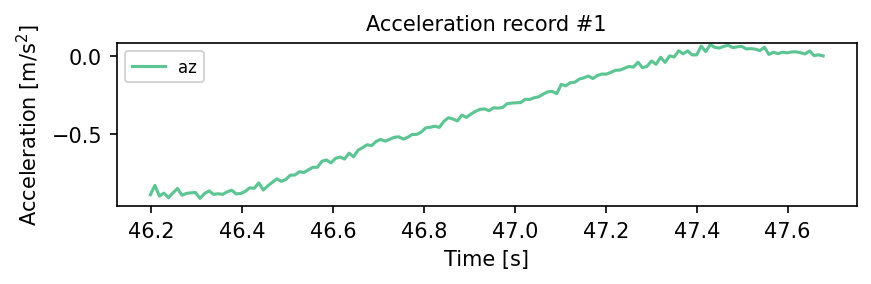

In [11]:
# Final fifth stage (increasing acceleration), about 1s:
accel_1.plot_raw_data(comps=['az'],label_font=6,i_range=[4650,4800],figsize=(6,2))

Conclusions for 1-level trips:
- 1st stage (increasing acceleration): 1s
- 2nd stage (constant acceleration): 1s
- 3rd stage (decreasing and increasing acceleration, down to negative): 1.2s
- 4th stage (constant acceleration): 1s
- 5th stage (decreasing acceleration): 1s

**Total time: About 5.2s**.

### Analysis for N-level flights, N>1

Same analysis as in the previous section, but for all other flights traveling more than 1 level.

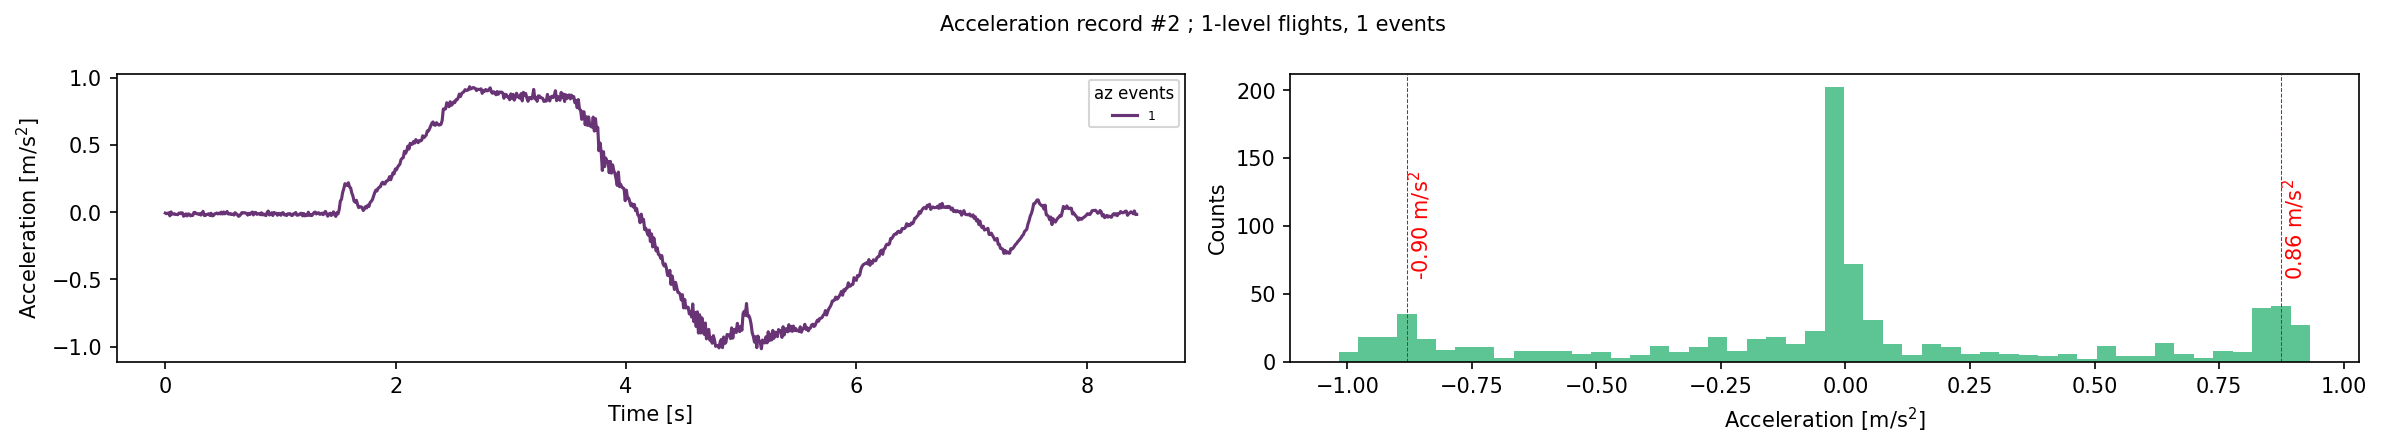

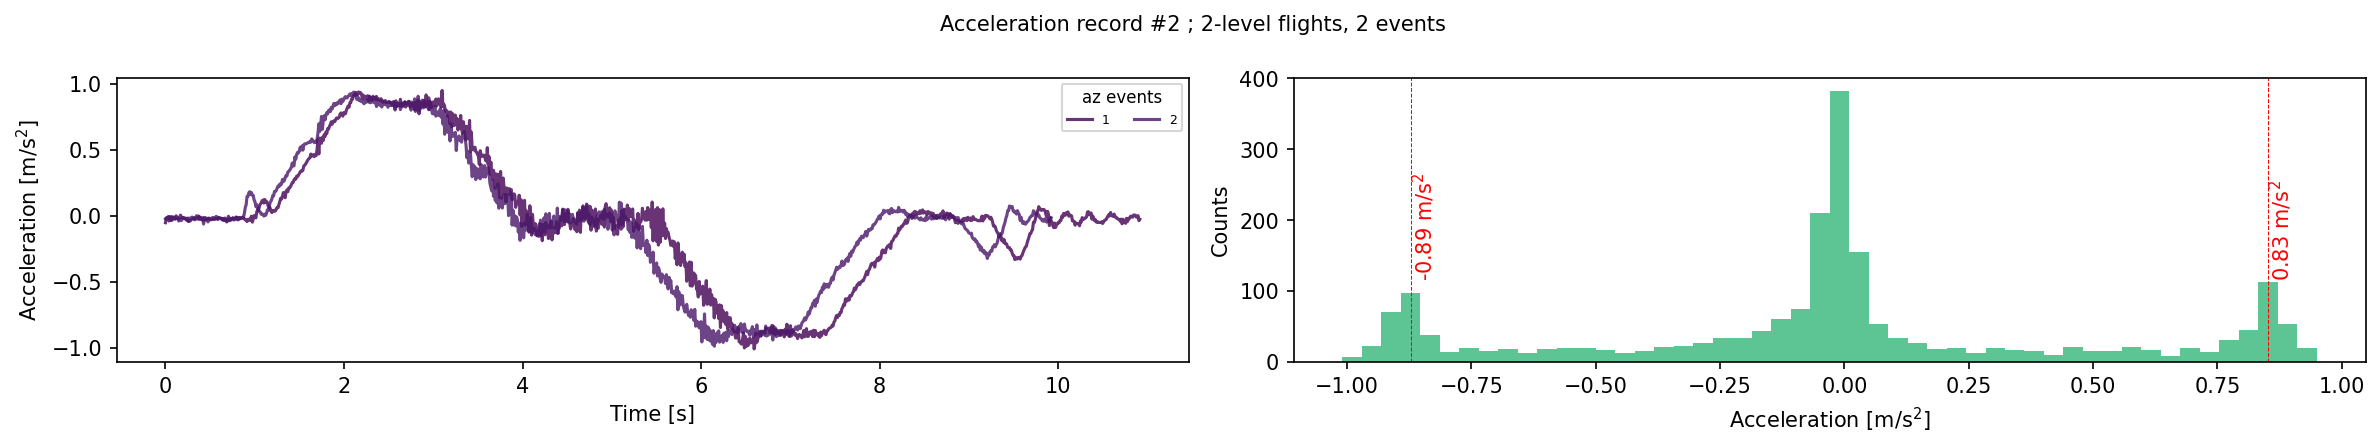

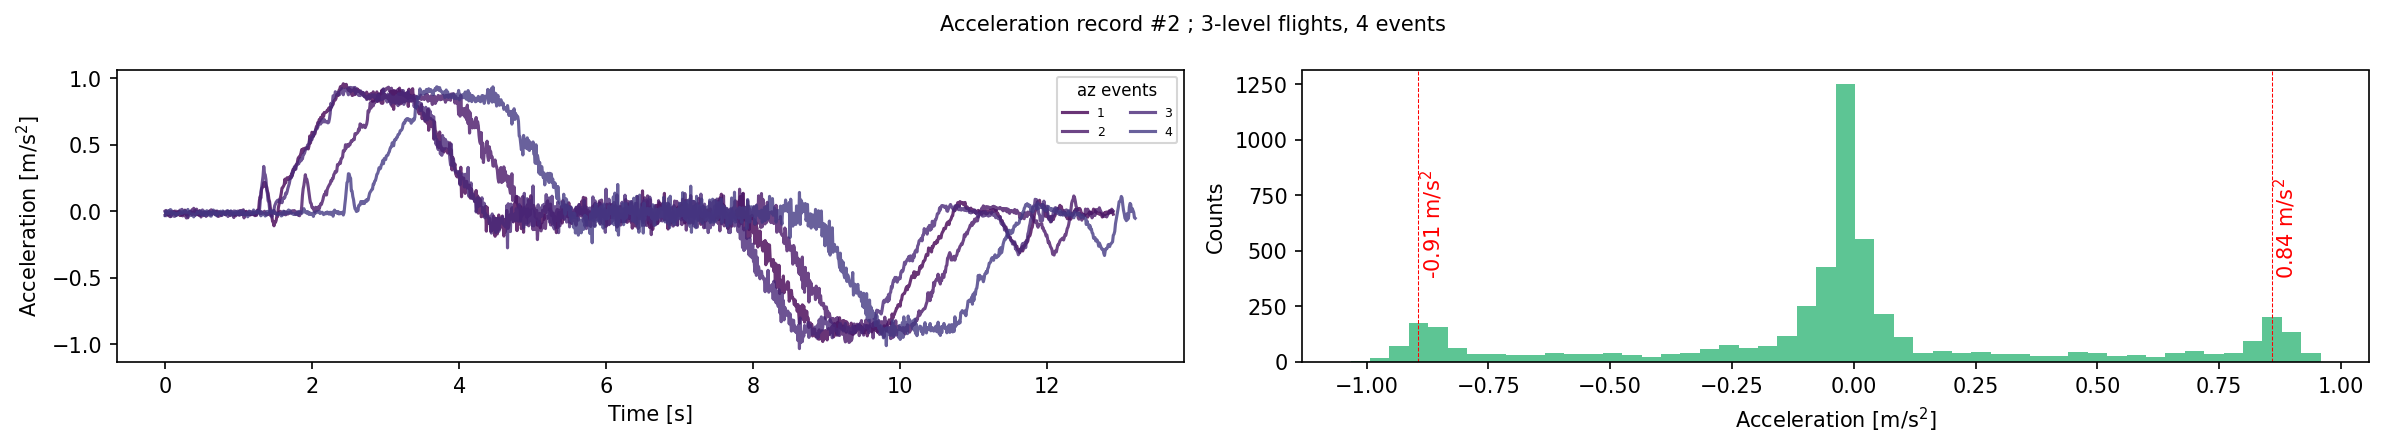

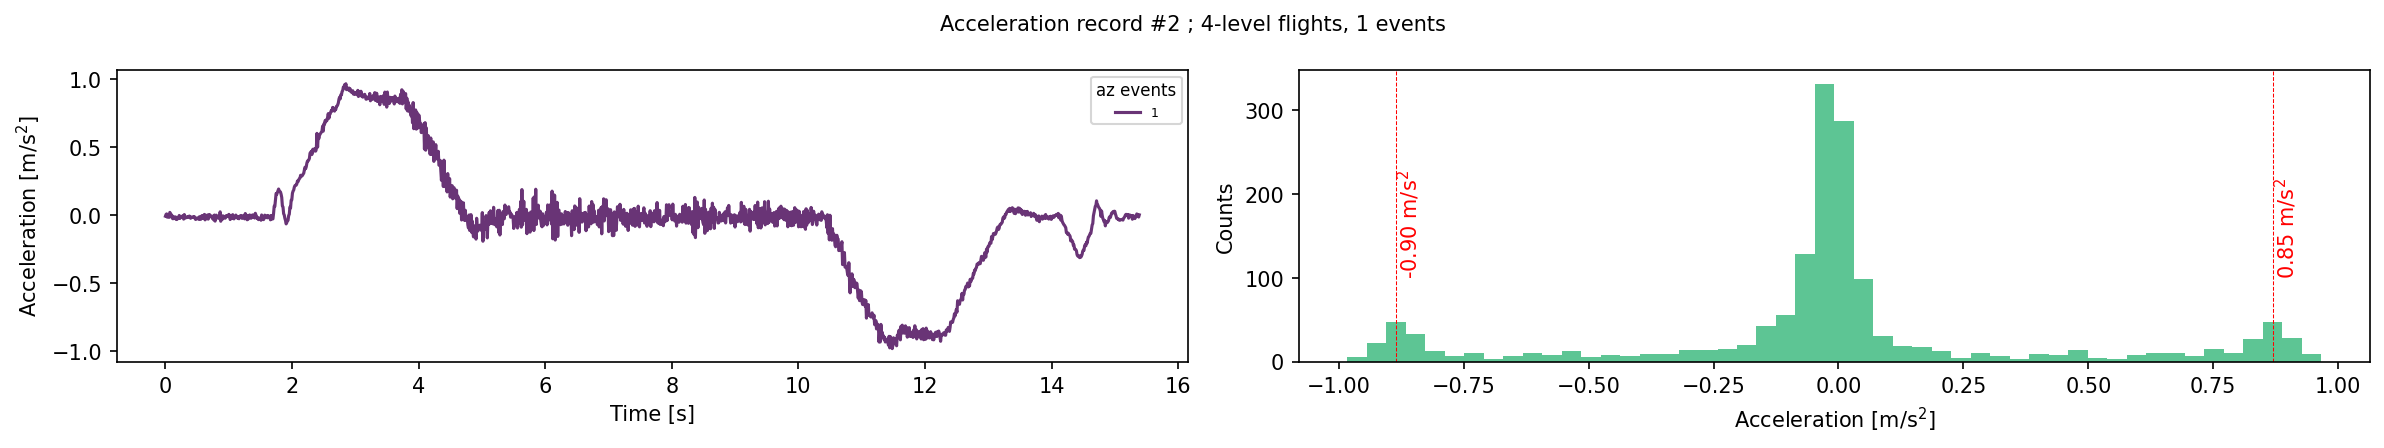

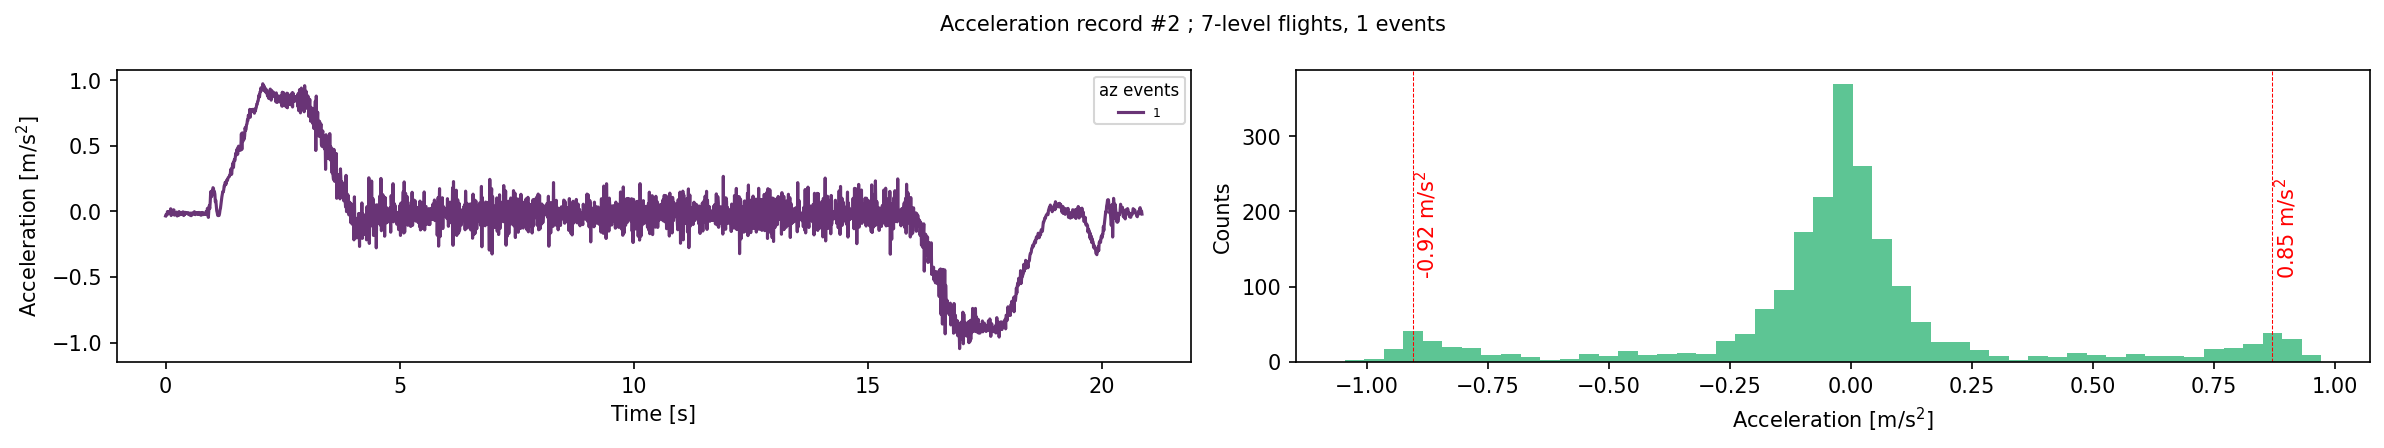

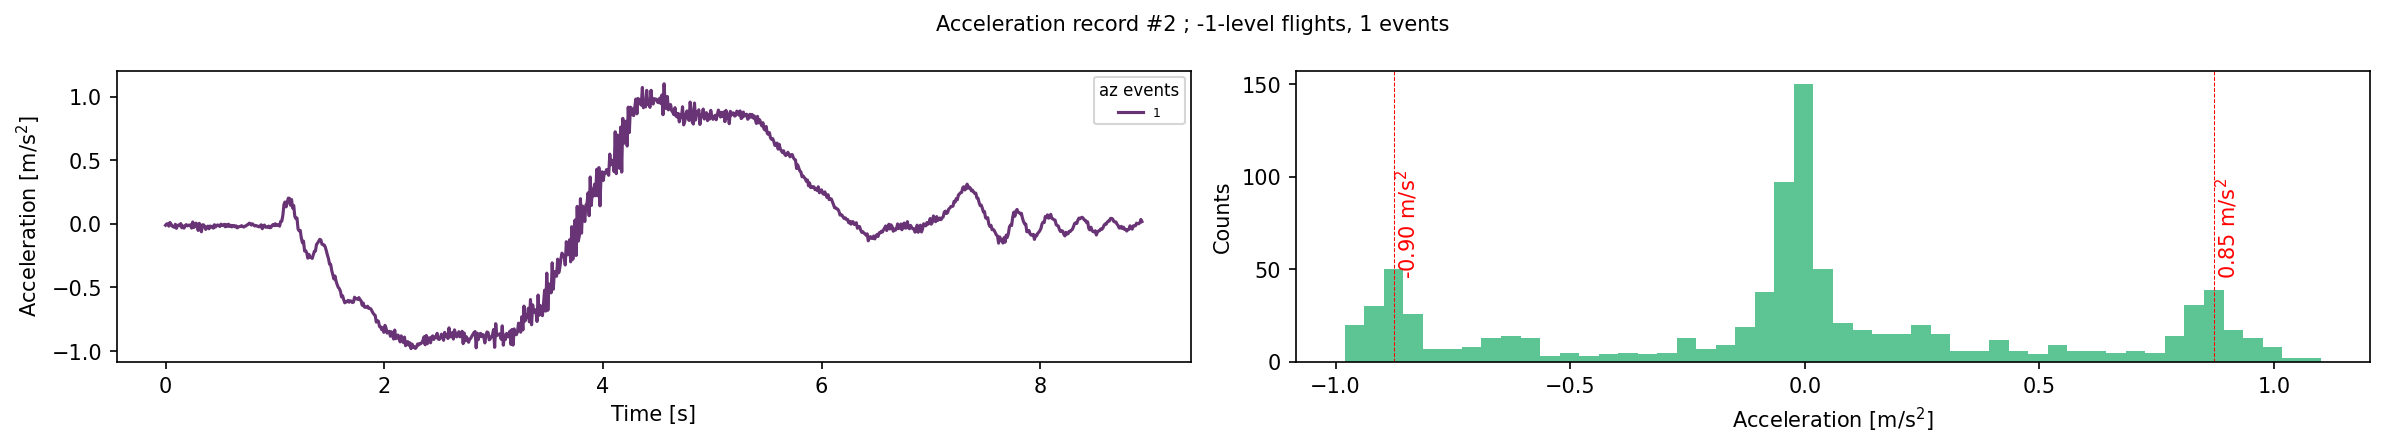

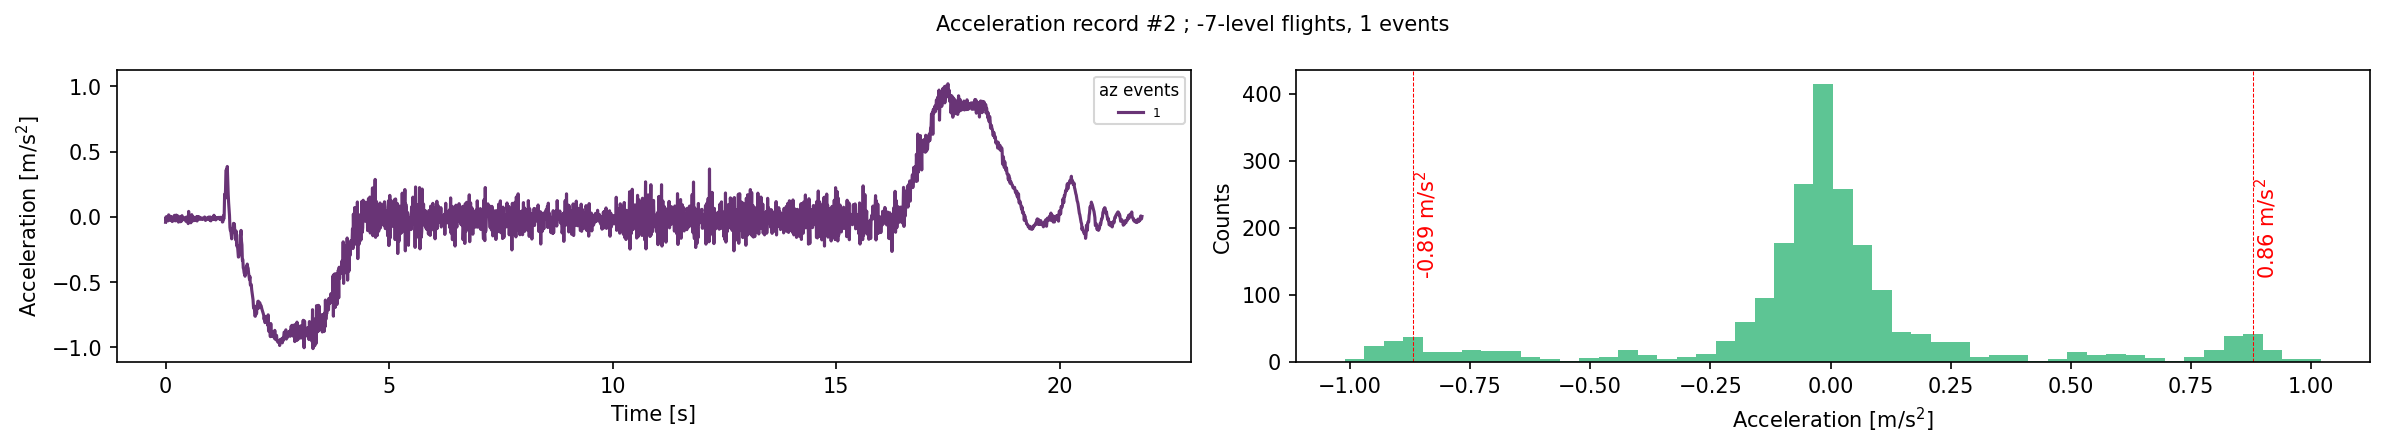

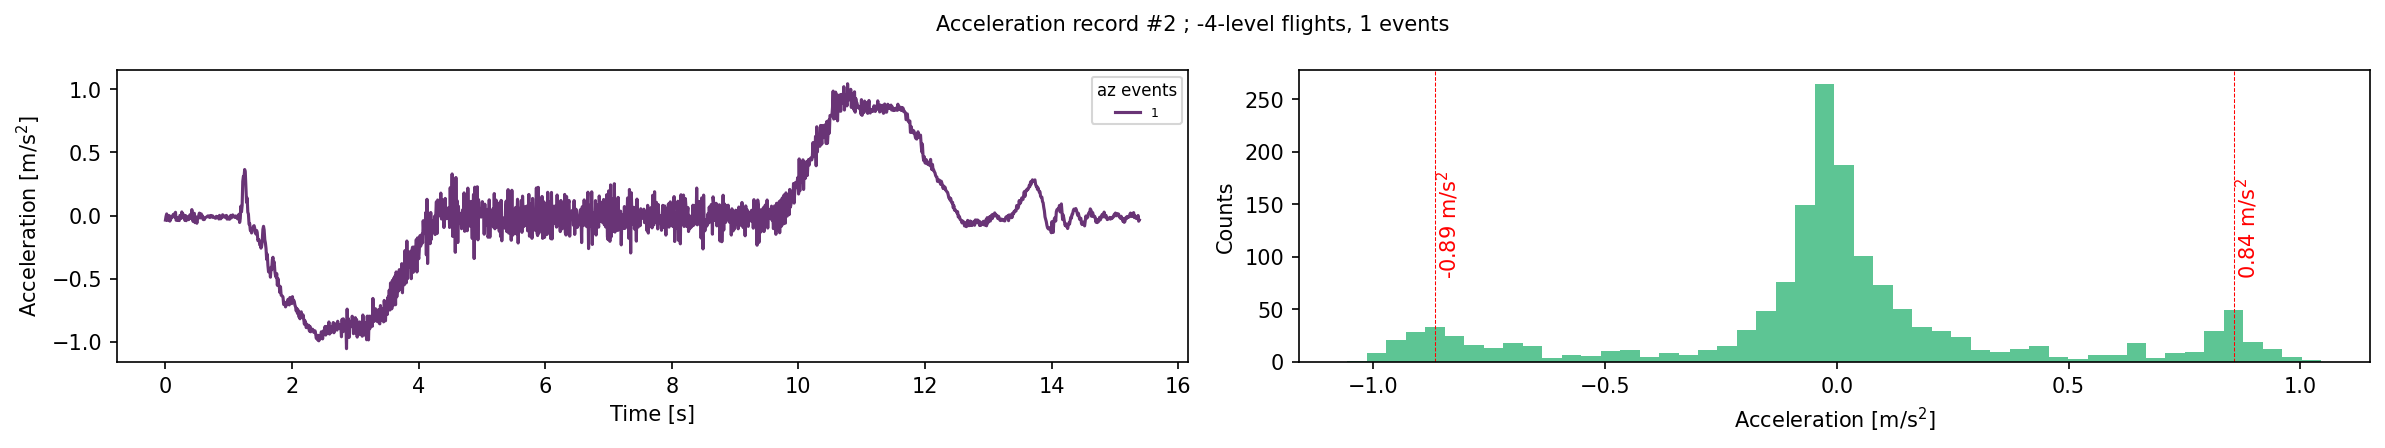

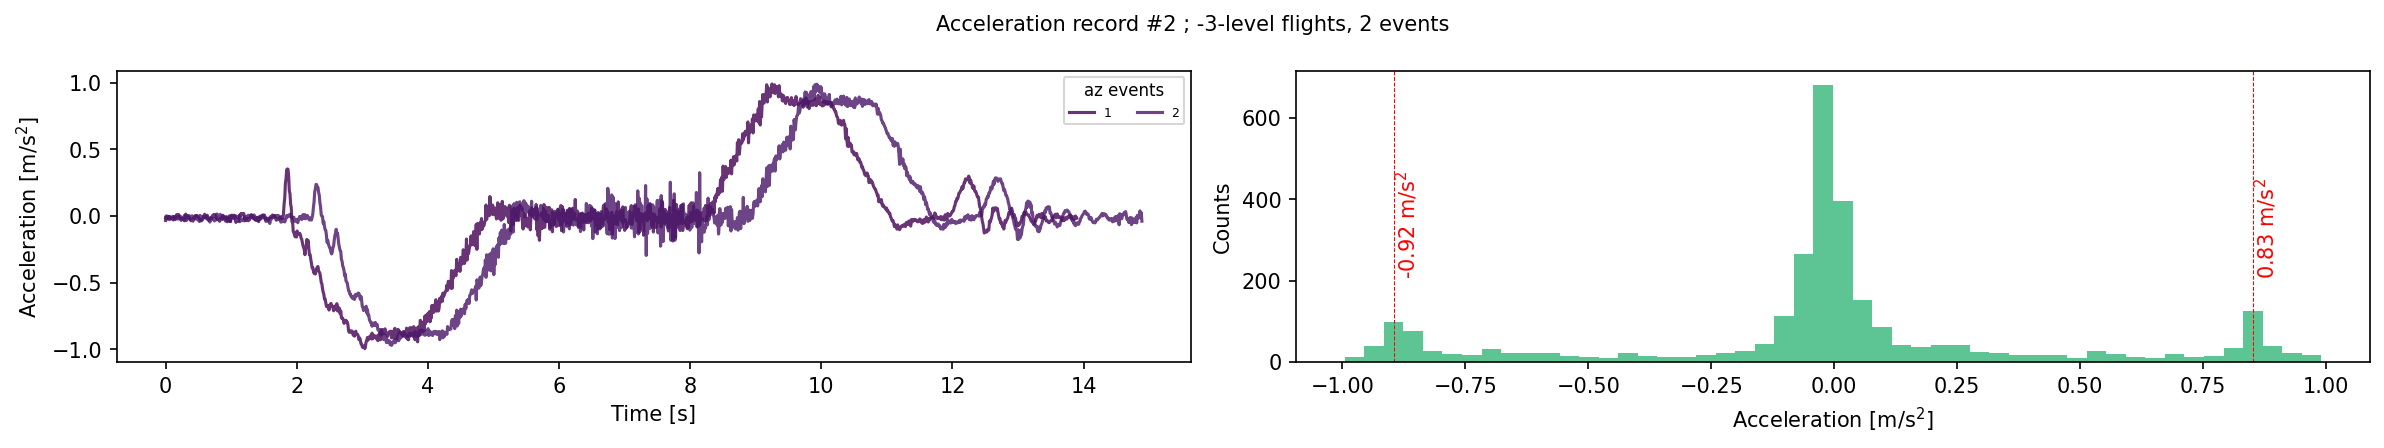

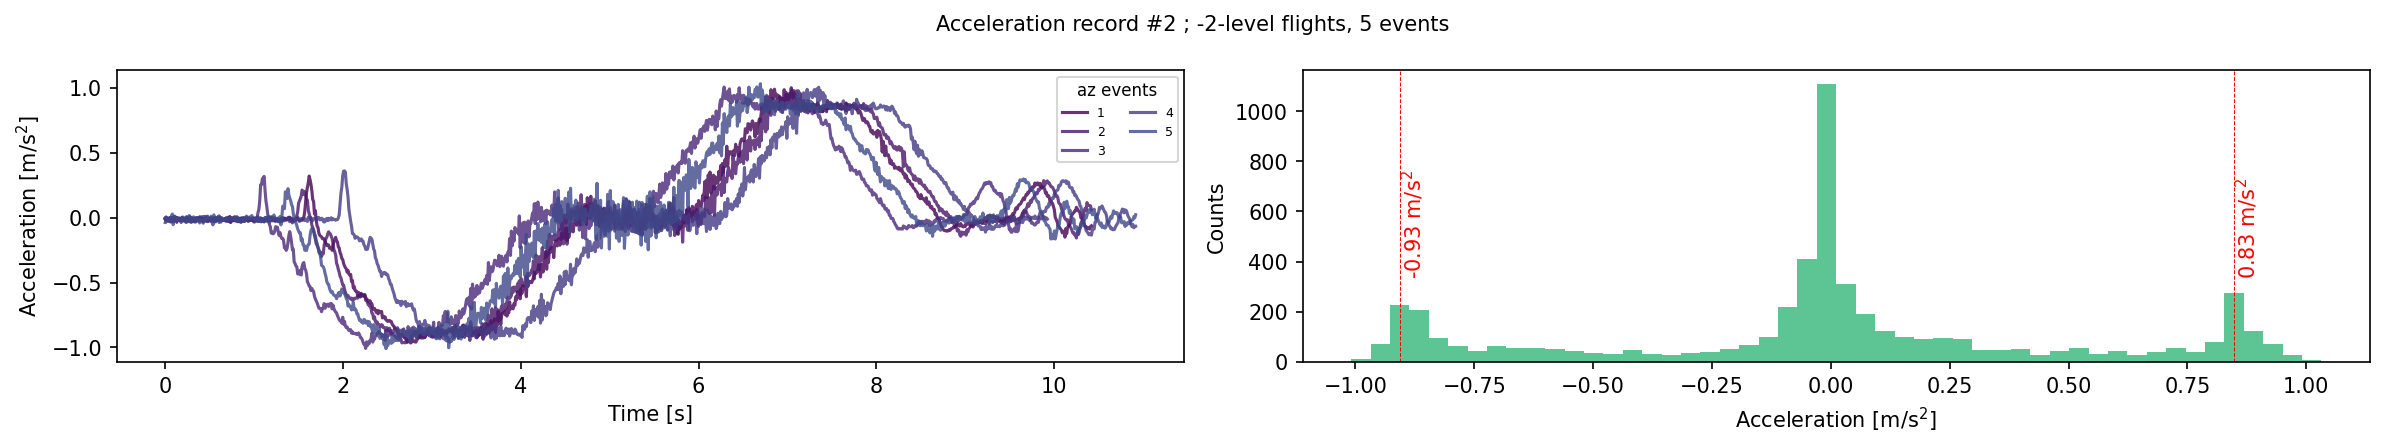

In [12]:
save_name = save_image_path+'Acceleration_rec2_hist'
accel_2.compare_same_flight_type(comp='az',N_bins=50,figsize=(16,3),a_thres=0.5,save_name=None)

Study a single 2-level trip:

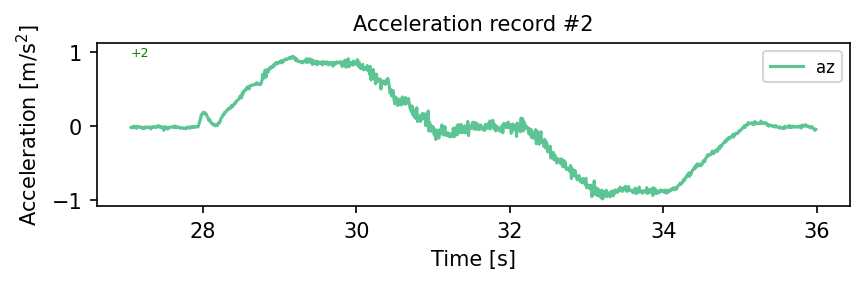

In [13]:
# Entire trip, about 7s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[2700,3600],figsize=(6,2))

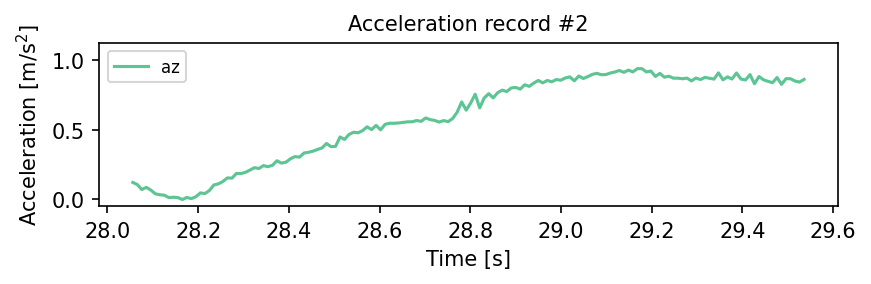

In [14]:
# First stage (increasing acceleration), about 1s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[2800,2950],figsize=(6,2))

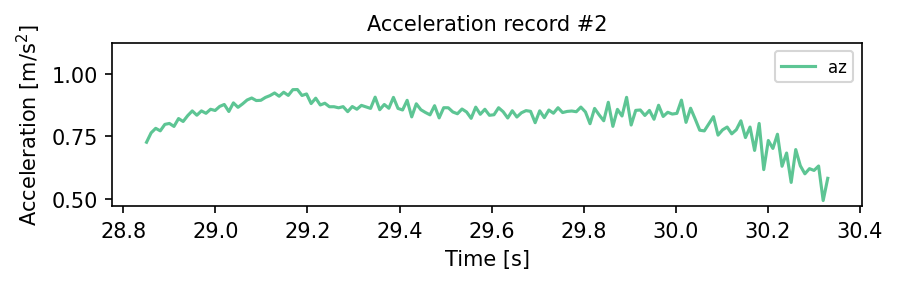

In [15]:
# Second stage (constant acceleration), about 1s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[2880,3030],figsize=(6,2))

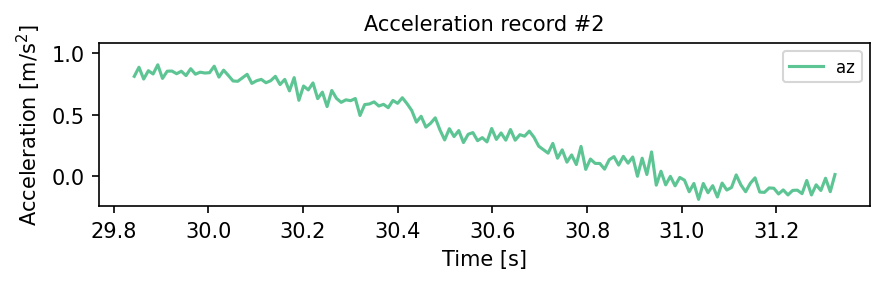

In [16]:
# Third stage (decreasing acceleration), about 1s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[2980,3130],figsize=(6,2))

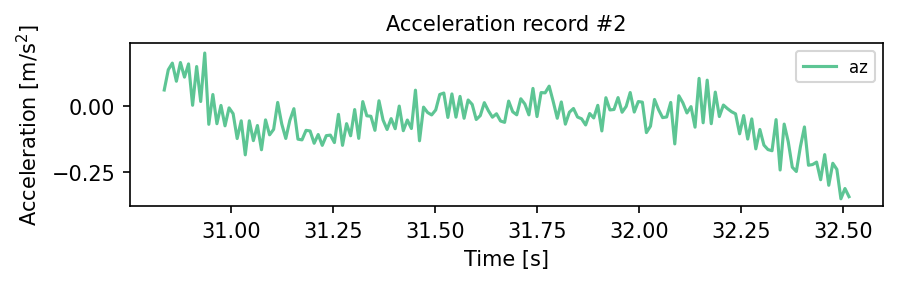

In [17]:
# Fourth stage (null acceleration), about 1.2s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[3080,3250],figsize=(6,2))

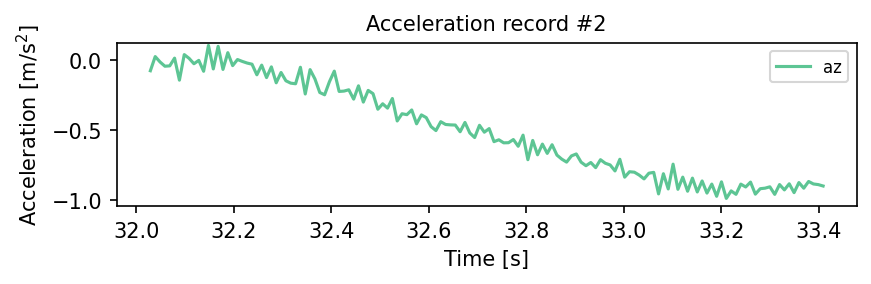

In [18]:
# Fifth stage (decreasing acceleration), about 1s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[3200,3340],figsize=(6,2))

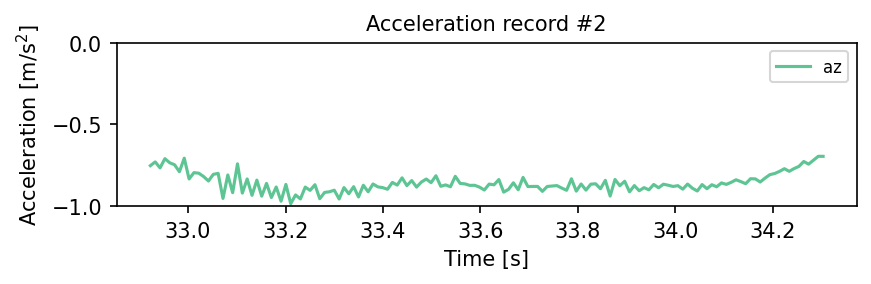

In [19]:
# Sixth stage (constant acceleration), about 1s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[3290,3430],figsize=(6,2))

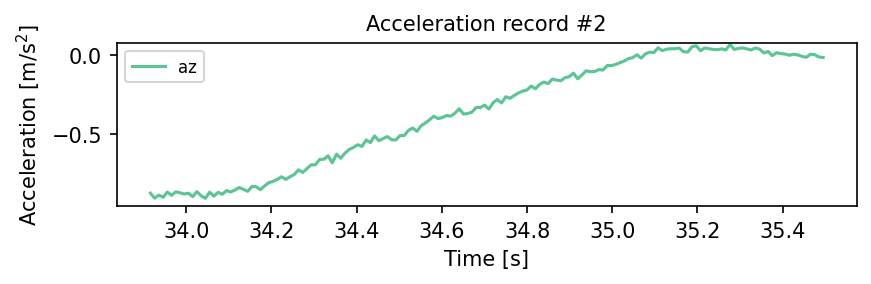

In [20]:
# Seventh stage (decreasing acceleration), about 1s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[3390,3550],figsize=(6,2))

Conclusions for 2-level trips:
- 1st stage (increasing acceleration): 1s
- 2nd stage (constant acceleration): 1s
- 3rd stage (decreasing): 1s
- 4th stage (null acceleration): 1.2s
- 5th stage (decreasing acceleration): 1s
- 6th stage (constant acceleration): 1s
- 7th stage (decreasing acceleration): 1s

**Total time: About 7.2s**.

**Average time per level: 3.6s**.

Study a single 3-level trip:

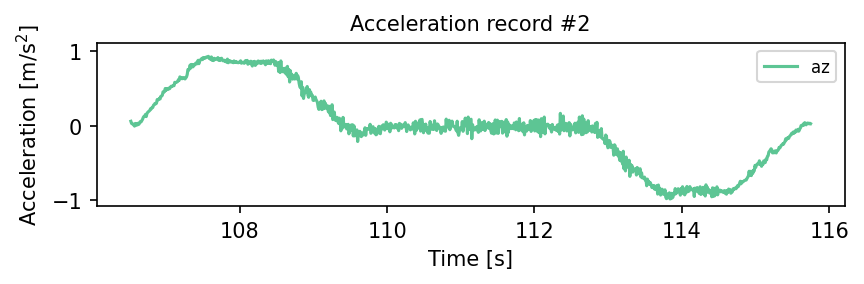

In [21]:
# Entire trip, approximate 9.3s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[10700,11630],figsize=(6,2))

**Total time: About 9.3s**.

**Average time per level: 3.1s**

Study a single 4-level trip:

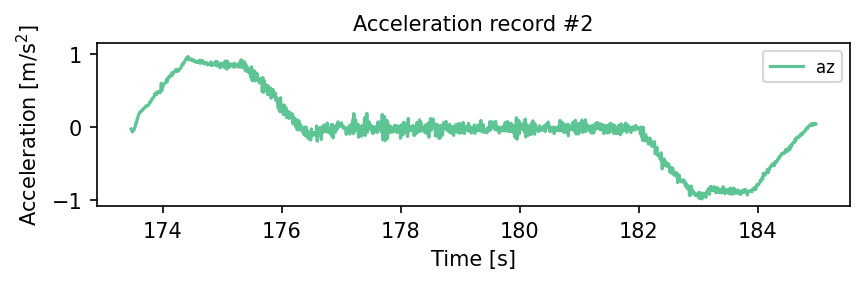

In [22]:
# Entire trip, approximate 11.6s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[17440,18600],figsize=(6,2))

**Total time: About 11.6s**.

**Average time per level: 2.9s**.

Study a single 7-level trip:

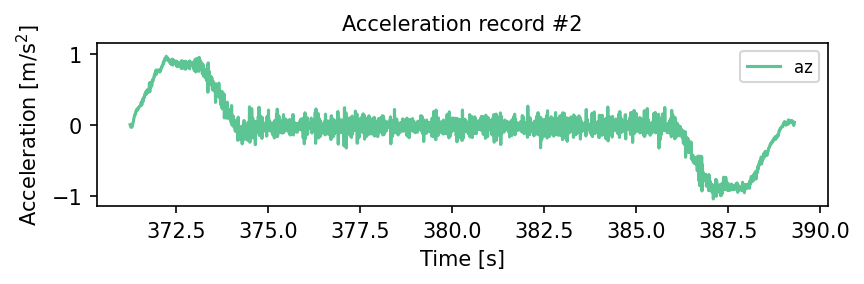

In [23]:
# Entire trip, approximate 18.2s:
accel_2.plot_raw_data(comps=['az'],label_font=6,i_range=[37110,38930],figsize=(6,2))

**Total time: About 18.2s**.

**Average time per level: 2.6s**.

### General analysis

Using the information from the different N-level flights, we compute the traveling times and average speeds

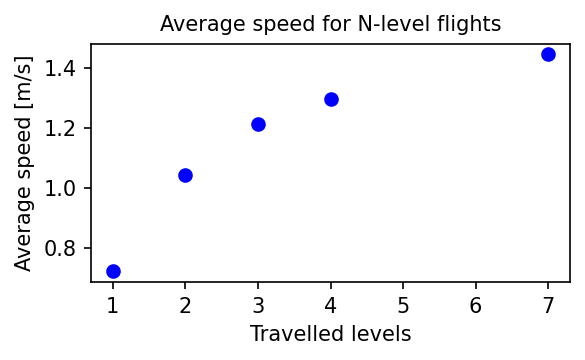

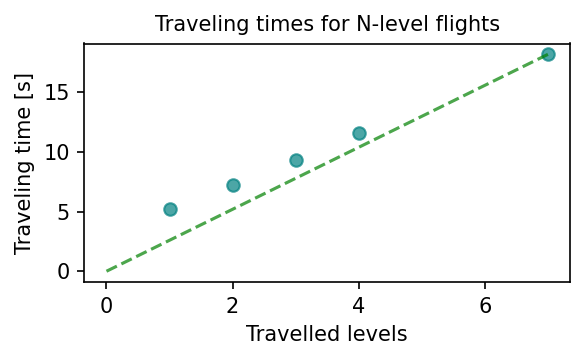

In [24]:
# Create a dictionary for flights with the number of travelled levels as keys, traveling times as values [s]:
lvl_t = {1:5.2, 2:7.2, 3:9.3, 4:11.6, 7:18.2}
levels = list(lvl_t.keys())
times = list(lvl_t.values()) # [s]
h = 3.76 # Average floor height [m] 
# Calculate average speed [m/s]:
lvl_v = {lvl:lvl*h/lvl_t[lvl] for lvl in lvl_t}

# Plot speeds as a function of travelled levels:
fig = plt.figure(figsize=(4,2.5))
plt.plot(levels,lvl_v.values(),'o',color='b')
plt.xlabel(xlabel='Travelled levels'), plt.ylabel('Average speed [m/s]')
plt.title('Average speed for N-level flights')
fig.tight_layout()
#plt.savefig(save_image_path+f'Acceleration_exp_speed_h{h}m.png') 

# Plot traveling time as a function of travelled levels:
fig = plt.figure(figsize=(4,2.5))
plt.plot(levels,times,'o',color='teal',alpha=0.7)
plt.plot([0,levels[-1]],[0,times[-1]],
         '--',color='green',alpha=0.7)
plt.xlabel(xlabel='Travelled levels'), plt.ylabel('Traveling time [s]')
plt.title('Traveling times for N-level flights')
fig.tight_layout()
#plt.savefig(save_image_path+f'Acceleration_exp_times_h{h}m.png') 

## Physical model for the elevator's movement

Using motion equations and making some assumptions in the elevator's movement at different stages, we can propose a physical model that describes the position of the elevator as a function of time.
The assumptions are the following:

* We ignore the little acceleration fluctations (noise) and assume that the elevator is capable of holding a perfect uniform acceleration and also linearly increasing or decreasing acceleration.
* Acceleration procedures going downwards and upwards are equivalent, except for their direction. From experimental data, we know that the maximum upwards acceleration is about 0.85 m/s$^2$, while its downwards equivalent is about 0.9 m/s$^2$. We simplify it and assume the maximum acceleration $a_0$ in any direction is $a_0=0.87$ m/s$^2$.
* When traveling **N-levels, N>1**, the movement can be described as follows:
1. Accelerate from 0 to $a_0$ in the traveling direction, over a time $\Delta t=1.0$ s.
2. Keep a constant acceleration $a_0$ in the traveling direction over a time $\Delta t=1.0$ s.
3. Decelerate to 0 over a time $\Delta t=1.0$ s. By the end of this step, a terminal velocity $V_0$ is reached in the traveling direction.
4. Travel at constant speed $V_0$ during a time $t_V$, which depends on the number of levels for the flight.
5. Accelerate from 0 to $a_0$ in the opposite traveling direction, over a time $\Delta t=1.0$ s.
6. Keep a constant acceleration $a_0$ in the opposite traveling direction over a time $\Delta t=1.0$ s.
7. Decelerate to 0 over a time $\Delta t=1.0$ s. By the end of this step, the elevator reaches the final parking position with null velocity.

* These are the equation describing the **N-levels fligths, N>1** for acceleration $a(t)$, velocity $v(t)$ and position $x(t)$ along the Z-axis as a function of time $t$:

$$
a(t)= \begin{cases}a_0 \frac{t}{\Delta t} & 0 \leqslant t \leqslant \Delta t \\ a_0, & \Delta t \leqslant t \leqslant 2 \Delta t \\ a_0 \frac{3 \Delta t-t}{\Delta t}, & 2 \Delta t \leqslant t \leqslant 3 \Delta t \\ 0, & 3 \Delta t \leqslant t \leqslant 3 \Delta t+t_V \\ -a_0 \frac{t-\left(3 \Delta t+t_V\right)}{\Delta t}, & 3 \Delta t+t_V \leqslant t \leqslant 4 \Delta t+t_V \\ -a_0, & 4 \Delta t+t_V \leqslant t \leqslant 5 \Delta t+t_V \\ -a_0 \frac{\left(6 \Delta t+t_V\right)-t}{\Delta t}, & 5 \Delta t+t_V \leqslant t \leqslant 6 \Delta t+t_V\end{cases}
$$

$$
v(t)= \begin{cases}\frac{1}{2} a_0 \frac{t^2}{\Delta t} & 0 \leqslant t \leqslant \Delta t \\ \frac{1}{2} a_0 \Delta t+a_0(t-\Delta t), & \Delta t \leqslant t \leqslant 2 \Delta t \\ 2 a_0 \Delta t-\frac{1}{2} a_0 \frac{(3 \Delta t-t)^2}{\Delta t}, & 2 \Delta t \leqslant t \leqslant 3 \Delta t \\ 2 a_0 \Delta t, & 3 \Delta t \leqslant t \leqslant 3 \Delta t+t_V \\ 2 a_0 \Delta t-\frac{1}{2} a_0 \frac{\left[t-\left(3 \Delta t+t_V\right)\right]^2}{\Delta t}, & 3 \Delta t+t_V \leqslant t \leqslant 4 \Delta t+t_V \\ \frac{3}{2} a_0 \Delta t-a_0\left[t-\left(4 \Delta t+t_V\right)\right], & 4 \Delta t+t_V \leqslant t \leqslant 5 \Delta t+t_V \\ \frac{1}{2} a_0 \frac{\left(6 \Delta t+t_V-t\right)^2}{\Delta t}, & 5 \Delta t+t_V \leqslant t \leqslant 6 \Delta t+t_V\end{cases}
$$

$$
x(t)= \begin{cases}\frac{1}{6} a_0 \frac{t^3}{\Delta t}, & 0 \leqslant t \leqslant \Delta t \\ \frac{1}{6} a_0(\Delta t)^2+\frac{1}{2} a_0 \Delta t(t-\Delta t)+\frac{1}{2} a_0(t-\Delta t)^2 & \Delta t \leqslant t \leqslant 2 \Delta t \\ \frac{8}{6} a_0(\Delta t)^2+\frac{3}{2} a_0 \Delta t(t-2 \Delta t)-\frac{1}{6} a_0 \frac{(3 \Delta t-t)^3}{\Delta t} & 2 \Delta t \leqslant t \leqslant 3 \Delta t \\ \frac{17}{6} a_0(\Delta t)^2+2 a_0 \Delta t(t-3 \Delta t) & 3 \Delta t \leqslant t \leqslant 3 \Delta t+t_V \\ \frac{17}{6} a_0(\Delta t)^2+2 a_0 \Delta t t_V+2 a_0 \Delta t\left[t-\left(3 \Delta t+t_V\right)\right]-\frac{1}{6} a_0 \frac{\left[t-\left(3 \Delta t+t_V\right)\right]^3}{\Delta t} & 3 \Delta t+t_V \leqslant t \leqslant 4 \Delta t+t_V \\ \frac{14}{3} a_0(\Delta t)^2+2 a_0 \Delta t t_V+\frac{3}{2} a_0 \Delta t\left[t-\left(4 \Delta t+t_V\right)\right]-\frac{1}{2} a_0\left[t-\left(4 \Delta t+t_V\right)\right]^2, & 4 \Delta t+t_V \leqslant t \leqslant 5 \Delta t+t_V \\ \frac{35}{6} a_0(\Delta t)^2+2 a_0 \Delta t t_V-\frac{1}{6} a_0 \frac{\left[\left(6 \Delta t+t_V\right)-t\right]^3}{\Delta t}, & 5 \Delta t+t_V \leqslant t \leqslant 6 \Delta t+t_V\end{cases}
$$

* When traveling a single level, **N=1**, the movement can be described as follows:
1. Accelerate from 0 to $a_0$ in the traveling direction, over a time $\Delta t=1.0$ s.
2. Keep a constant acceleration $a_0$ in the traveling direction over a time $\Delta t=1.0$ s.
3. Decelerate to 0 over a time $\Delta t'=0.6$ s and immediately after accelerate to $a_0$ in the opposite traveling direction over a time $\Delta t'=0.6$ s. Then, the total time for this step is $2\Delta t'=1.2$ s.
4. Keep a constant acceleration $a_0$ in the opposite traveling direction over a time $\Delta t=1.0$ s.
5. Decelerate to 0 over a time $\Delta t=1.0$ s. By the end of this step, the elevator reaches the final parking position with null velocity.

* These are the equation describing the **1-level fligths, N=1** for acceleration $a(t)$, velocity $v(t)$ and position $x(t)$ along the Z-axis as a function of time $t$:

$$
a(t)= \begin{cases}a_0 \frac{t}{\Delta t} & 0 \leqslant t \leqslant \Delta t \\ a_0, & \Delta t \leqslant t \leqslant 2 \Delta t \\ a_0 \frac{\left(2 \Delta t+\Delta t^{\prime}\right)-t}{\Delta t^{\prime}}, & 2 \Delta t \leqslant t \leqslant 2 \Delta t+2 \Delta t^{\prime} \\ -a_0, & 2 \Delta t+2 \Delta t^{\prime} \leqslant t \leqslant 3 \Delta t+2 \Delta t^{\prime} \\ -a_0 \frac{\left(4 \Delta t+2 \Delta t^{\prime}\right)-t}{\Delta t}, & 3 \Delta t+2 \Delta t^{\prime} \leqslant t \leqslant 4 \Delta t+2 \Delta t^{\prime}\end{cases}
$$

$$
v(t)= \begin{cases}\frac{1}{2} a_0 \frac{t^2}{\Delta t}, & 0 \leqslant t \leqslant \Delta t \\ \frac{1}{2} a_0 \Delta t+a_0(t-\Delta t), & \Delta t \leqslant t \leqslant 2 \Delta t \\ \frac{3}{2} a_0 \Delta t+\frac{1}{2} a_0 \Delta t^{\prime}-\frac{1}{2} a_0 \frac{\left[\left(2 \Delta t+\Delta t^{\prime}\right)-t\right]^2}{\Delta t^{\prime}}, & 2 \Delta t \leqslant t \leqslant 2 \Delta t+2 \Delta t^{\prime} \\ \frac{3}{2} a_0 \Delta t-a_0\left[t-\left(2 \Delta t+2 \Delta t^{\prime}\right)\right], & 2 \Delta t+2 \Delta t^{\prime} \leqslant t \leqslant 3 \Delta t+2 \Delta t^{\prime} \\ \frac{1}{2} a_0 \frac{\left[\left(4 \Delta t+2 \Delta t^{\prime}\right)-t\right]^2}{\Delta t}, & 3 \Delta t+2 \Delta t^{\prime} \leqslant t \leqslant 4 \Delta t+2 \Delta t^{\prime}\end{cases}
$$

$$
x(t)= \begin{cases}\frac{1}{6} a_0 \frac{t^3}{\Delta t} & 0 \leqslant t \leqslant \Delta t \\ \frac{1}{6} a_0(\Delta t)^2+\frac{1}{2} a_0 \Delta t(t-\Delta t)+\frac{1}{2} a_0(t-\Delta t)^2, & \Delta t \leqslant t \leqslant 2 \Delta t \\ \frac{7}{6} a_0(\Delta t)^2-\frac{1}{6} a_0\left(\Delta t^{\prime}\right)^2+\frac{3}{2} a_0 \Delta t(t-2 \Delta t)+\frac{1}{2} a_0 \Delta t^{\prime}(t-2 \Delta t)+\frac{1}{6} a_0 \frac{\left[\left(2 \Delta t+\Delta t^{\prime}\right)-t\right]^3}{\Delta t^{\prime}}, & 2 \Delta t \leqslant t \leqslant 2 \Delta t+2 \Delta t^{\prime} \\ \frac{7}{6} a_0(\Delta t)^2+\frac{2}{3} a_0\left(\Delta t^{\prime}\right)^2+3 a_0 \Delta t \Delta t^{\prime}+\frac{3}{2} a_0 \Delta t\left[t-\left(2 \Delta t+2 \Delta t^{\prime}\right)\right]-\frac{1}{2} a_0\left[t-\left(2 \Delta t+2 \Delta t^{\prime}\right)\right]^2, & 2 \Delta t+2 \Delta t^{\prime} \leqslant t \leqslant 3 \Delta t+2 \Delta t^{\prime} \\ \frac{7}{3} a_0(\Delta t)^2+\frac{2}{3} a_0\left(\Delta t^{\prime}\right)^2+3 a_0 \Delta t \Delta t^{\prime}-\frac{1}{6} a_0 \frac{\left[\left(4 \Delta t+2 \Delta t^{\prime}\right)-t\right]^3}{\Delta t} & 3 \Delta t+2 \Delta t^{\prime} \leqslant t \leqslant 4 \Delta t+2 \Delta t^{\prime}\end{cases}
$$

In [25]:
# Generate a model with the standard parameters:
a_model = ML_elev.elev_motion_model(name='Standard parameters')
a_model.info()

----------  elev_motion_model object  ---------- 
Name: Standard parameters

----- Basic information -----
Maximum Z-acceleration (either direction) 0.87 m/s^2.
Time to accelerate from 0 to max. accel. or vice-versa in N-level flights, N>1: 1.0 s.
Time to accelerate from 0 to max. accel. or vice-versa in 1-level flights: 0.6 s.
Time resolution for generated data 0.1 m.
Average separation between adjacent levels: 3.76m.
Number of levels in the bulding: 8

----- Theoretical fitting -----
Total trip duration only adjusting t_V:


,N-level flight,Total time [s],Traveling time at tV [s]
0,1,5.20,0.00
1,2,7.41,1.41
2,3,9.57,3.57
3,4,11.73,5.73
4,5,13.89,7.89
5,6,16.05,10.05
6,7,18.21,12.21


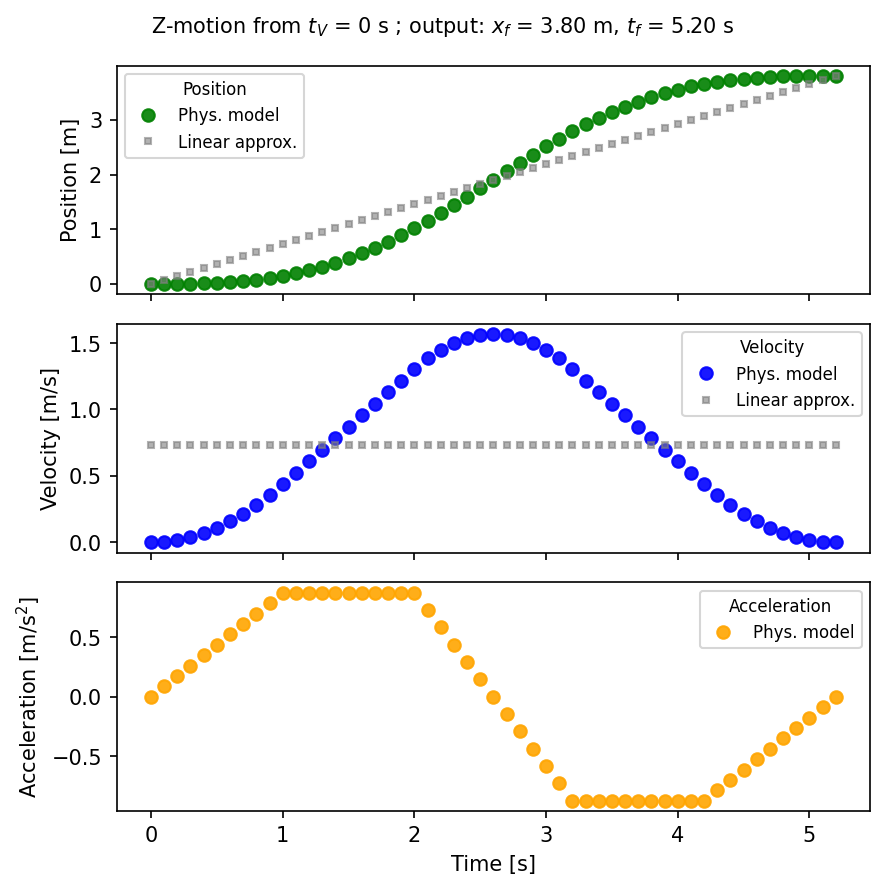

In [28]:
# Plot an example of the Z-motion according to the physical model:
t_V = 0 # Duration for interval with constant terminal velocity [s]
save_name = save_image_path+f'Zmotion_model_tV_{t_V}s'
a_model.gen_motion_from_tV(
    t_V,going_up=True,save_name=save_name,save_format='svg')

## Comparison between experiments and physical model

Let's compare the experimental data with the model results. On the one hand, we can the standard parameters $(a_0,\Delta t,\Delta t')$ found experimentally and use them to evaluate the motion equations. In the case of 1-level flights, we get the final travelled distance:

$$
x_f=\frac{7}{3} a_0(\Delta t)^2+\frac{2}{3} a_0\left(\Delta t^{\prime}\right)^2+3 a_0 \Delta t \Delta t^{\prime} \text {, for 1-level flights. }
$$

For multiple-level flights, we have to choose an interval time $t_V$ traveling at terminal velocity $V=2a_0\Delta t$, which will determine the final position:

$$
x_f=\frac{35}{6} a_0(\Delta t)^2+2 a_0 \Delta t\, t_V \text { for } \mathrm{N} \text {-level flights, } \mathrm{N}>1.
$$

For the **1-level flights**, there is very good agreement between the physical's model results $x_{f,model}=3.8$m and the average target value $x_{f,target}=3.76m$, but for our Machine Learning model we need to prioritize the experimental results, which should reproduce the real values $x_{f,real}$, which are either 4.1m for trips involving the lowest level 1, or 3.7m for any other trips. Remember that in order to build a simplified physical model, we assumed an average distance $x_{f,target}=3.76m$ for any two adjacent levels. The only way to match any of the target or real quantities is to change the parameters $(a_0,\Delta t,\Delta t')$. In doing so, we also should agree in the total traveling time $t_{total}$ according to the experimental results:

$$
t_{\text {total }}=4 \Delta t+2 \Delta t^{\prime} \text {, for 1-level flights.}
$$

For the **N-level flights, N>1**, we have a tunable parameter $t_V$ that can be chosen to fit any distance $x_f$ that we want. However, the model should also reproduce the experimental $t_{total}$:

$$
t_{\text {total }}=6 \Delta t+t_V, \text { for } \mathrm{N} \text {-level flights, } \mathrm{N}>1,
$$

then by correcting $x_f$ using just $t_V$ we may incur in a disagreement in $t_{total}$. The only way to match the two experimental values will be to play around with all parameters $(a_0,\Delta t,\Delta t',t_V)$.

### Traveling times according to standard parameters and fitting only $t_V$

In this section, we get the traveling times according to the physical model by requiring that the final position $x_f$ is equal to an average target $x_{f,target}=3.76$m. In doing so, we will only tune the parameter $t_V$, which means that for 1-level flights $x_f=3.8$m is fixed, as well as $t_{total}=5.2$s. Furthermore, we compare the model and experimental results, using the experimental average speeds for each N-level flight:

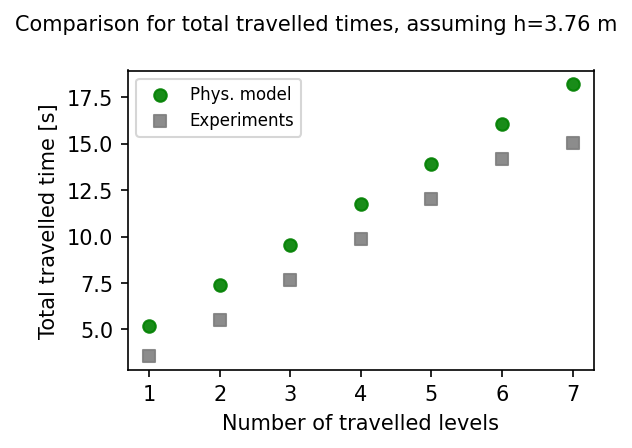

In [34]:
# Average experimental speeds and traveling times for each N-level flight:
h = 3.76 # Average inter-level distance [m]
avg_v_exp = {1:1.06,2:1.36,3:1.47,4:1.52,5:1.56,6:1.59,7:1.75} # keys are N levels, values are avg. speed [m/s]
total_time_exp = {N:h*N/avg_v_exp[N] for N in avg_v_exp}  # keys are N levels, values are avg. traveling times [s]

# Compare model and experimental total traveling time:
save_name = save_image_path+f'Total_times_comparison_h{a_model.h}m'
a_model.compare_totaltime_with_exp(total_time_exp,save_name=None)

From this plot, it is clear that the model overestimates the total traveling times, apparently by a fixed amount. 

In the experimental data, the N=7 point apparently deviates from the linear trend, but this is most likely an experimental error because this is the only N-level flight that has a single datapoint, while all the others have many instances and the average is a more representative result.

### How we fit experimental data with the physical model

The previous section focused on fitting $t_V$ so the physical model predicts the correct travel distance $x_f$, but there is no agreement in the total traveling time $t_{total}$. In order to to **fit the experimental data with the model**, we need that **both quantities $x_f$ and $t_{total}$ agree**. The only way to accomplish this is to also tune the parameters $(a_0,\Delta t,\Delta t')$.

Our criterion is to fix the following values:

* $\Delta t = 2 \Delta t'$ for **1-level flights**.
* $\Delta t \leq 1$s and as large as possible for **N-level flights, N>1**.

Under these conditions, $t_{total}$ can be described as follows:

$$
t_{total}(\Delta t,t_V)= \begin{cases}
5 \Delta t,
& \text{for 1-level flights} \\
6 \Delta t \; ; \; t_V=0,
& \text{for N-level flights, N>1} \, \& \, t_{total} \leq \text{6s} \\ 
6 \Delta t + t_V \; ; \; \Delta t=1 \text{s}, 
& \text{for N-level flights, N>1} \, \& \, t_{total}>\text{6s}
\end{cases}
$$

Once $\Delta t$ and $t_V$ are fixed, the travelled distance $x_f$ must be corrected using $a_0$:

$$
x_{f}(a_0,t_{total})= \begin{cases}
\frac{4}{25}t_{total}^{2}a_0,
& \text{for 1-level flights} \\
\frac{35}{216}t_{total}^{2}a_0,
& \text{for N-level flights, N>1} \, \& \, t_{total} \leq \text{6s} \\ 
(2t_{total}-\frac{37}{6} \,\text{[s]})a_0\,\text{[s]}, 
& \text{for N-level flights, N>1} \, \& \, t_{total}>\text{6s}
\end{cases}
$$

Using these equations, the average experimental values for $t_{total}$ and a simplified average inter-level distance of 3.76m, we calculate the average values for the parameters $(a_0,\Delta t,t_V)$:

In [35]:
a_model.fit_amax_deltat_tV_for_exp(total_time_exp)
a_model.info()

Experimentally fitted amax, deltat and tV have been updated.
----------  elev_motion_model object  ---------- 
Name: Standard parameters

----- Basic information -----
Maximum Z-acceleration (either direction) 0.87 m/s^2.
Time to accelerate from 0 to max. accel. or vice-versa in N-level flights, N>1: 1.0 s.
Time to accelerate from 0 to max. accel. or vice-versa in 1-level flights: 0.6 s.
Time resolution for generated data 0.1 m.
Average separation between adjacent levels: 3.76m.
Number of levels in the bulding: 8

----- Theoretical fitting -----
Total trip duration only adjusting t_V:


,N-level flight,Total time [s],Traveling time at tV [s]
0,1,5.20,0.00
1,2,7.41,1.41
2,3,9.57,3.57
3,4,11.73,5.73
4,5,13.89,7.89
5,6,16.05,10.05
6,7,18.21,12.21



----- Experimental fitting -----
Parameters to match experimental results:


,N-level flight,Max. accel. [m/s^2],Lin. accel. time [s],Term. Vel. time [s]
0,1,1.87,0.71,0.00
1,2,1.52,0.92,0.00
2,3,1.23,1.00,1.67
3,4,1.10,1.00,3.89
4,5,1.05,1.00,6.05
5,6,1.02,1.00,8.19
6,7,1.10,1.00,9.04


According to these results, it may seem that the elevator uses a different maximum acceleration value for each type of N-level flight. However, the experimental analysis suggests that the acceleration pattern is constant, and we have not observed any acceleration values with intensity higher than 1 m/s$^2$.

It is much more likely that the experimental registry is inaccurate, with errors in the inital and final traveling times. As we just used the a recording of the elevator's display to account for its position, we may assume that we are introducing systematic errors, apparently underestimating the total traveling times.

Even though the experimental records are not perfect, we are designing our Machine Learning application to monitor an object in real-time using minimal information and experimental data, avoiding the need of any physical models. If we simply use a linear approximation for the Z-position of the elevator, the result is not so distant from the physical model, as can be seen in previous plots.

Therefore, we can conclude that having a precise physical model that describes the elevator motion can improve the monitoring accuracy. However, just using a linear approximation for the position combined with the experimental results is a great approximation to the ground truth, and serves the practical purposes of our application.